# Photo-Reverberation Mapping Tutorial

## Imports

In [6]:
import photRM

import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
plt.style.use('bmh')

import seaborn as sns
sns.set_theme()
sns.set_context('paper')

In [2]:
np.random.seed(42)

## Artificial lcs

### Generating

In [3]:
x_band_43, y_band_43, line_response_43 = photRM.lc_two_bands(5000, osc=True, A=0.14, noise=0.00005, z=0.1, 
                                                             lag='random', wl=0.2, wc=0.8, lum=43)

Properties of the simulated AGN object:
---------------------------------------
log(L) = 43.00
MBH = 3.14e+06 M_sun
tau_DRW = 17.31 days
sigma_DRW = 0.05 mag^2/day
Time-lag = 9.86 days


In [21]:
x_band_43

,t,flux,err
0,1,0.935300,0.004836
1,2,0.938463,0.004844
2,3,0.937414,0.004841
3,4,0.941332,0.004851
4,5,0.950695,0.004875
...,...,...,...
4995,4996,0.943477,0.004857
4996,4997,0.942991,0.004855
4997,4998,0.947180,0.004866
4998,4999,0.966530,0.004916


In [4]:
x_band_44, y_band_44, line_response_44 = photRM.lc_two_bands(5000, osc=True, A=0.14, noise=0.00005, z=0.1, 
                                                             lag='random', wl=0.2, wc=0.8, lum=44)

Properties of the simulated AGN object:
---------------------------------------
log(L) = 44.00
MBH = 1.46e+07 M_sun
tau_DRW = 31.98 days
sigma_DRW = 0.03 mag^2/day
Time-lag = 33.65 days


In [5]:
x_band_45, y_band_45, line_response_45 = photRM.lc_two_bands(5000, osc=True, A=0.14, noise=0.00005, z=0.1, 
                                                             lag='random', wl=0.2, wc=0.8, lum=45)

Properties of the simulated AGN object:
---------------------------------------
log(L) = 45.00
MBH = 6.76e+07 M_sun
tau_DRW = 59.10 days
sigma_DRW = 0.01 mag^2/day
Time-lag = 114.82 days


### Saving

In [22]:
x_band_43_cut = x_band_43[:1000]
y_band_43_cut = y_band_43[:1000]
x_band_44_cut = x_band_44[:1000]
y_band_44_cut = y_band_44[:1000]
x_band_45_cut = x_band_45[:1000]
y_band_45_cut = y_band_45[:1000]

In [23]:
dir_path = 'T5_data/'

'''np.savetxt(dir_path + 'x_band_43', np.c_[x_band_43_cut.t, x_band_43_cut.flux, x_band_43_cut.err], 
           fmt=['%.1f','%.7e','%.7e'])
np.savetxt(dir_path + 'y_band_43', np.c_[y_band_43_cut.t, y_band_43_cut.flux, y_band_43_cut.err], 
           fmt=['%.1f','%.7e','%.7e'])
np.savetxt(dir_path + 'x_band_44', np.c_[x_band_44_cut.t, x_band_44_cut.flux, x_band_44_cut.err], 
           fmt=['%.1f','%.7e','%.7e'])
np.savetxt(dir_path + 'y_band_44', np.c_[y_band_44_cut.t, y_band_44_cut.flux, y_band_44_cut.err], 
           fmt=['%.1f','%.7e','%.7e'])
np.savetxt(dir_path + 'x_band_45', np.c_[x_band_45_cut.t, x_band_45_cut.flux, x_band_45_cut.err], 
           fmt=['%.1f','%.7e','%.7e'])
np.savetxt(dir_path + 'y_band_45', np.c_[y_band_45_cut.t, y_band_45_cut.flux, y_band_45_cut.err], 
           fmt=['%.1f','%.7e','%.7e'])''';

### Plotting

In [16]:
def plot_artificial_lc(x_band, y_band, line_response, flux_units=None, savefig=False, save_filename=None):
    '''
    Plots the artificial lcs as in the notebook PhotoReverberationMappingAGN.ipynb
    written by I. Jankov et al.
    '''
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, figsize=(15,9), tight_layout=True)
    ax1.errorbar(y_band['t'], y_band['flux'], yerr = y_band['err'] ,fmt='ko', markersize=2, alpha=0.6, 
                 capsize=3, label='continuum + line LC (Y-band)')
    ax2.errorbar(x_band['t'], x_band['flux'], yerr=x_band['err'], fmt='bo', markersize=2, alpha=0.6,
                 capsize=3, label='continuum LC (X-band)')
    ax3.plot(line_response['t'], line_response['flux'], 'ro-', markersize=2, alpha=0.6, label='line response')

    loc = plticker.MultipleLocator(100)

    for ax in [ax1, ax2, ax3]:
        ax.legend(fontsize=13,markerscale=2)

        if flux_units==None:
            ax.set_ylabel('Flux', fontsize=18, labelpad=10)
        else:
            ax.set_ylabel('Flux'+flux_units, fontsize=18, labelpad=10)
        
        ax.tick_params(direction='in', pad=5, labelsize=13)
        ax.set_xlim(0, 1000)
        ax.xaxis.set_major_locator(loc)

    ax3.set_xlabel('Time (days)',fontsize=18,labelpad=10)

    if savefig:
        plt.savefig(save_filename+'.pdf')

    plt.show()

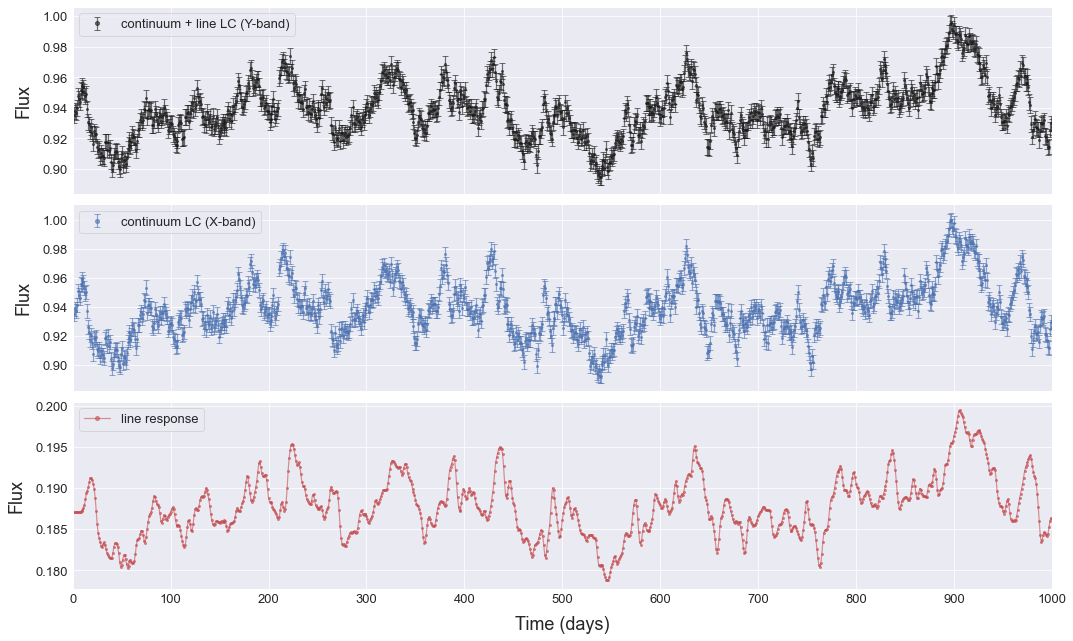

In [17]:
plot_artificial_lc(x_band_43_cut, y_band_43_cut, line_response_43[:1000], 
                   savefig=True, save_filename='art_lcs_logL43')

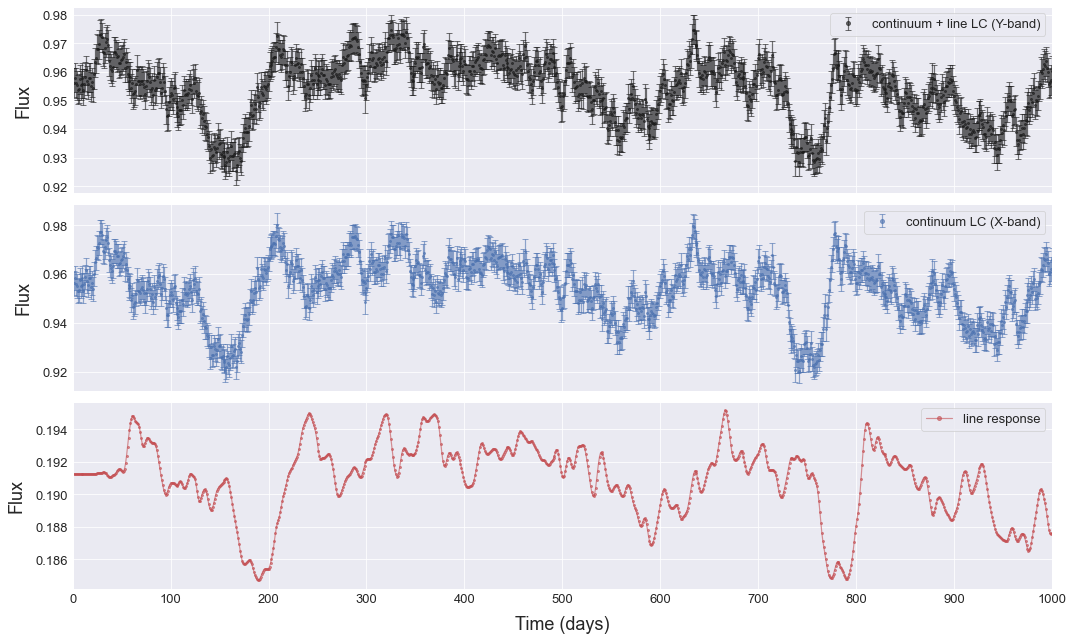

In [18]:
plot_artificial_lc(x_band_44_cut, y_band_44_cut, line_response_44[:1000], 
                   savefig=True, save_filename='art_lcs_logL44')

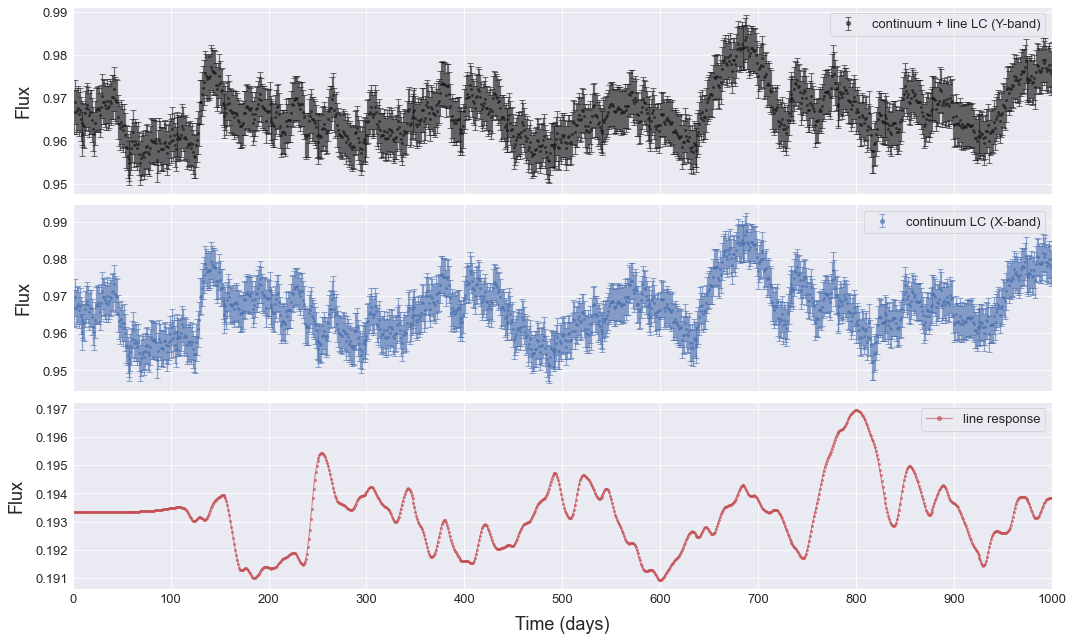

In [19]:
plot_artificial_lc(x_band_45_cut, y_band_45_cut, line_response_45[:1000], 
                   savefig=True, save_filename='art_lcs_logL45')